# Simple linear regression

## Import the relevant libraries

In [1]:
# For these lessons we will need NumPy, pandas, matplotlib and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# and of course the actual regression (machine learning) module
from sklearn.linear_model import LinearRegression

## Load the data
### Nice Artice Read This - https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/

In [2]:
# We start by loading the data
data = pd.read_csv('1.01. Simple linear regression.csv')

# Let's explore the top 5 rows of the df
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


## Create the regression

### Declare the dependent and independent variables

In [3]:
# There is a single independent variable: 'SAT'
x = data['SAT']

# and a single depended variable: 'GPA'
y = data['GPA']

In [4]:
# Often it is useful to check the shapes of the features
x.shape

(84,)

In [5]:
y.shape

(84,)

In [6]:
# In order to feed x to sklearn, it should be a 2D array (a matrix)
# Therefore, we must reshape it 
# Note that this will not be needed when we've got more than 1 feature (as the inputs will be a 2D array by default)

# x_matrix = x.values.reshape(84,1)
x_matrix = x.values.reshape(-1,1)

# Check the shape just in case
x_matrix.shape

(84, 1)

### Regression itself
Full documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [7]:
# We start by creating a linear regression object
reg = LinearRegression()

In [8]:
# The whole learning process boils down to fitting the regression
# Note that the first argument is the independent variable, while the second - the dependent (unlike with StatsModels)
reg.fit(x_matrix,y)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/base.py:503: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### R-squared

In [9]:
# To get the R-squared in sklearn we must call the appropriate method
reg.score(x_matrix,y)

0.40600391479679754

### Coefficients

In [10]:
# Getting the coefficients of the regression
# Note that the output is an array, as we usually expect several coefficients
reg.coef_

array([0.00165569])

### Intercept

In [11]:
# Getting the intercept of the regression
# Note that the result is a float as we usually expect a single value
reg.intercept_

0.2750402996602781

### Making predictions

In [12]:
# There is a dedicated method should we want to predict values
# Note that the result is an array, as we can predict more than one value at a time
new_data = pd.DataFrame(data=[1740],columns=['SAT'])
reg.predict(new_data)

array([3.15593751])

In [13]:
# To be in line with our knowledge so far, we can create a pandas data frame with several different values of SAT
new_data = pd.DataFrame(data=[1740,1760],columns=['SAT'])
new_data

,SAT
0,1740
1,1760


In [14]:
# We can predict the whole data frame in bulk
# Note that the result is an array, this time with 2 elements
reg.predict(new_data)

array([3.15593751, 3.18905127])

In [15]:
# Finally, we can directly store the predictions in a new series of the same dataframe
new_data['Predicted_GPA'] = reg.predict(new_data)
new_data

,SAT,Predicted_GPA
0,1740,3.155938
1,1760,3.189051


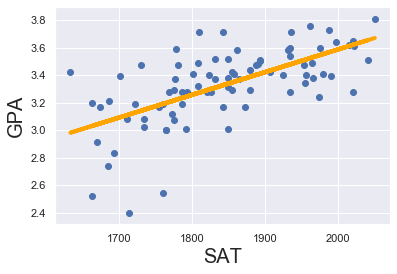

In [16]:
# There are different ways to plot the data - here's the matplotlib code
plt.scatter(x,y)

# Parametrized version of the regression line
yhat = reg.coef_*x_matrix + reg.intercept_

# Non-parametrized version of the regression line
#yhat = 0.0017*x + 0.275

# Plotting the regression line
fig = plt.plot(x,yhat, lw=4, c='orange', label ='regression line')

# Labelling our axes
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()